In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.layers import Activation, Dense, LocallyConnected1D
from keras.layers import LocallyConnected2D, MaxPooling2D
from keras import callbacks

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/train7291.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test2007.csv")

In [3]:
# Converts into a numpy array
train_set = train_df.values
test_set = test_df.values

In [4]:
# Separate labels and features
x_train = train_set[:,1:257]
x_test = test_set[:,1:257]

y_train = train_set[:,0]
y_test = test_set[:,0]

#convert labels -> int
y_test = y_test.astype(int)
y_train = y_train.astype(int)
print("Test labels: ", y_test)
print("Train labels: ", y_train)


Test labels:  [9 6 3 ... 4 0 1]
Train labels:  [6 5 4 ... 3 0 1]


In [5]:
# x_train: Dimension, shape, size
print(x_train.ndim)
x_train = x_train.reshape(7291, 16, 16)
x_test = x_test.reshape(2007, 16, 16)

2


In [6]:
# y_train: Shape, size, dimension
print(y_train.ndim)
print(y_train.shape)
print(y_train.size)

1
(7291,)
7291


In [7]:
#scale the images to the [0,1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32") / 255

In [8]:
# Change the image shape
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
input_shape = (16,16,1)


In [10]:
#CAUTION -> Running this twice will increase the dimension of y_test and y_train
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(7291, 10)
(2007, 10)


In [20]:
# Initial model withouth weight initialization

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(7, 7), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 10, 10, 32)        1600      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
# model with zero wight initializer
'''
initializerZero = tf.keras.initializers.Zeros()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(7, 7), activation="relu", kernel_initializer=initializerZero),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="tanh", kernel_initializer=initializerZero),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()'''

In [ ]:
# model with orthogonal class wight initializer

'''
initializerOth = tf.keras.initializers.Orthogonal(gain=1.0, seed=None)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(7, 7), activation="relu", kernel_initializer=initializerOth),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="tanh", kernel_initializer=initializerOth),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()'''

In [ ]:
# model with Random Normal values wight initializer
'''
initializerRanNorm = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(7, 7), activation="relu", kernel_initializer=initializerRanNorm),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="tanh", kernel_initializer=initializerRanNorm),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()'''

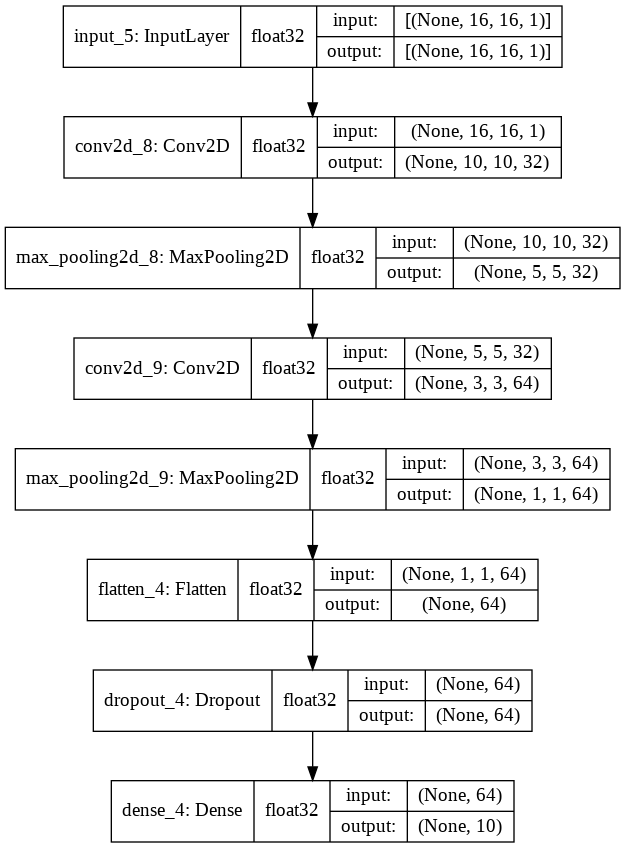

In [21]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True)

In [22]:
# Initial compiling functions

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
52/52 [==============================] - 2s 28ms/step - loss: 2.2758 - accuracy: 0.1591 - val_loss: 2.2408 - val_accuracy: 0.1781
Epoch 2/15
52/52 [==============================] - 1s 24ms/step - loss: 2.2010 - accuracy: 0.2495 - val_loss: 2.0897 - val_accuracy: 0.3178
Epoch 3/15
52/52 [==============================] - 1s 21ms/step - loss: 1.9345 - accuracy: 0.3298 - val_loss: 1.6940 - val_accuracy: 0.4329
Epoch 4/15
52/52 [==============================] - 1s 21ms/step - loss: 1.5663 - accuracy: 0.4940 - val_loss: 1.3698 - val_accuracy: 0.5836
Epoch 5/15
52/52 [==============================] - 1s 22ms/step - loss: 1.3231 - accuracy: 0.5841 - val_loss: 1.1760 - val_accuracy: 0.6589
Epoch 6/15
52/52 [==============================] - 1s 20ms/step - loss: 1.1682 - accuracy: 0.6353 - val_loss: 1.0354 - val_accuracy: 0.6918
Epoch 7/15
52/52 [==============================] - 1s 20ms/step - loss: 1.0464 - accuracy: 0.6792 - val_loss: 0.9157 - val_accuracy: 0.7301
Epoch 8/15
52

In [ ]:
# Batch size optimization techniques
# Uncomment each abtch size to test with 128, 64 and 10

'''
#batch_size = 128
#batch_size = 64
batch_size = 10
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
'''

In [ ]:
# Learning rate optimization code block
# Uncomment each optimizer depending on the learning rate to test

'''
#optimizer = keras.optimizers.Adam(lr=0.01)  # uncoment for First test learning rate = 0.01
#optimizer = keras.optimizers.Adam(lr=0.001) # uncoment for Second test learning rate = 0.001
optimizer = keras.optimizers.Adam(lr=0.0001) # uncoment for Third test learning rate = 0.0001
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
'''

In [ ]:
# Mommentum optimization code block
# Uncomment each sgd depending on the mommentum to test

'''
batch_size = 128
epochs = 15

#sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.05, nesterov=True)
#sgd = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.99, nesterov=True)

model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
'''

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5638745427131653
Test accuracy: 0.834080696105957


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


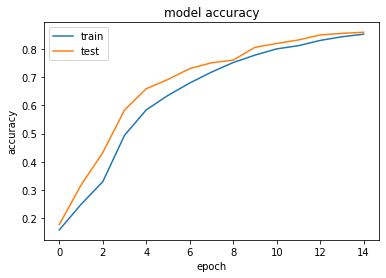

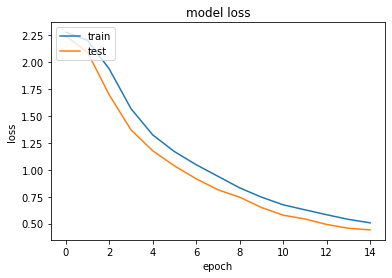

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()